In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Phần 1:

###Câu 1:

In [13]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print(df.head(5))
    return df

data = load_data("/content/titanic_disaster.csv")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


###Câu 2:

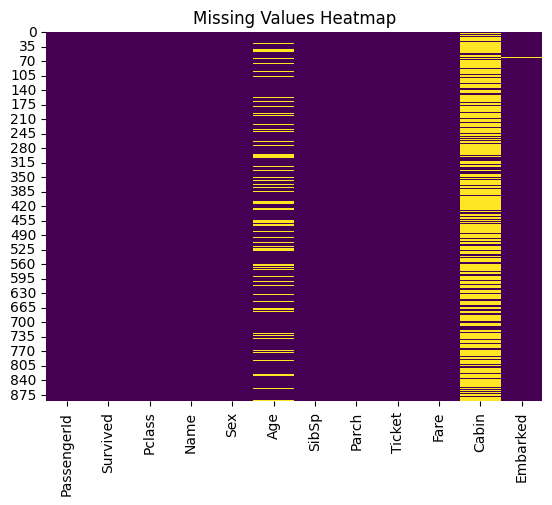

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
print(data.isnull().sum())

###Câu 3:

In [15]:
data[['firstName', 'secondName']] = data['Name'].str.split(',', expand=True)
data.drop(columns=['Name'], inplace=True)
print(data)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0              1         0       3    male  22.0      1      0   
1              2         1       1  female  38.0      1      0   
2              3         1       3  female  26.0      0      0   
3              4         1       1  female  35.0      1      0   
4              5         0       3    male  35.0      0      0   
..           ...       ...     ...     ...   ...    ...    ...   
886          887         0       2    male  27.0      0      0   
887          888         1       1  female  19.0      0      0   
888          889         0       3  female   NaN      1      2   
889          890         1       1    male  26.0      0      0   
890          891         0       3    male  32.0      0      0   

               Ticket     Fare Cabin Embarked  firstName  \
0           A/5 21171   7.2500   NaN        S     Braund   
1            PC 17599  71.2833   C85        C    Cumings   
2    STON/O2. 3101282   7.9

###Câu 4:

In [16]:
data['Sex'] = data['Sex'].map({'male': 'M', 'female': 'F'})
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F   NaN      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

###Câu 5:

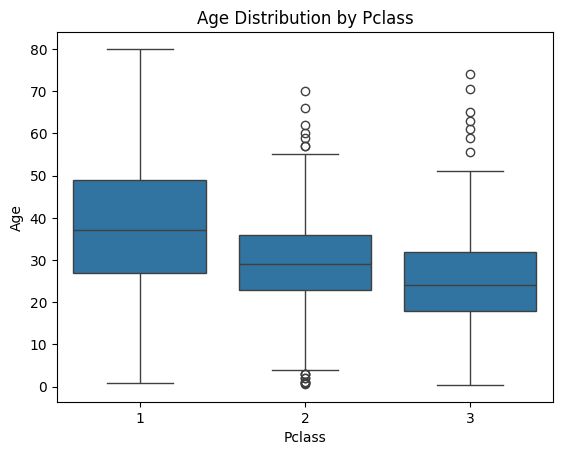

<ipython-input-17-a7d1654b1c1e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data.groupby('Pclass')['Age'].transform('median'), inplace=True)


In [17]:
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title("Age Distribution by Pclass")
plt.show()

data['Age'].fillna(data.groupby('Pclass')['Age'].transform('median'), inplace=True)

###Câu 6:

In [19]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 60, 100], labels=['Kid', 'Teen', 'Adult', 'Older'])
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

###Câu 7:

In [21]:
data['namePrefix'] = data['secondName'].str.extract('(Mr|Mrs|Miss|Master)')
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

###Câu 8:

In [22]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

###Câu 9:

In [24]:
data['Alone'] = (data['FamilySize'] == 1).astype(int)
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

###Câu 10:

In [25]:
data['CabinType'] = data['Cabin'].astype(str).str[0]
data['CabinType'].fillna("Unknown", inplace=True)
print(data)

     PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  firstName 

<ipython-input-25-2be7b879f848>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CabinType'].fillna("Unknown", inplace=True)


###Câu 11:

In [26]:
data.drop_duplicates(inplace=True)
data.to_csv("cleaned_titanic.csv", index=False)

#Phần 2:

###Câu 12:

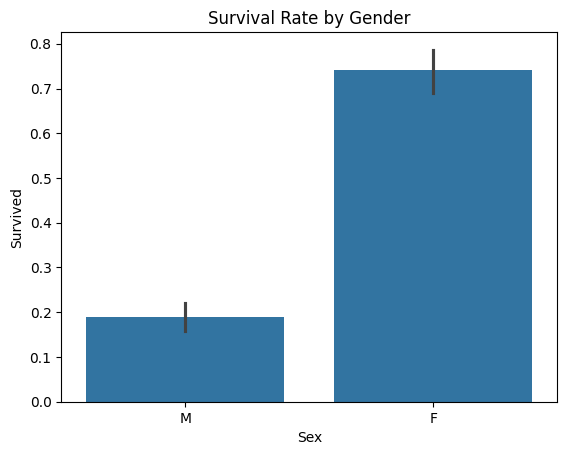

In [27]:
sns.barplot(x='Sex', y='Survived', data=data)
plt.title("Survival Rate by Gender")
plt.show()

###Câu 13:

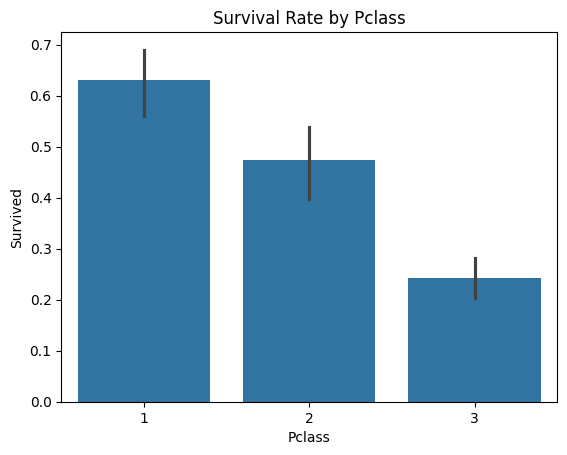

In [28]:
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title("Survival Rate by Pclass")
plt.show()

###Câu 14:

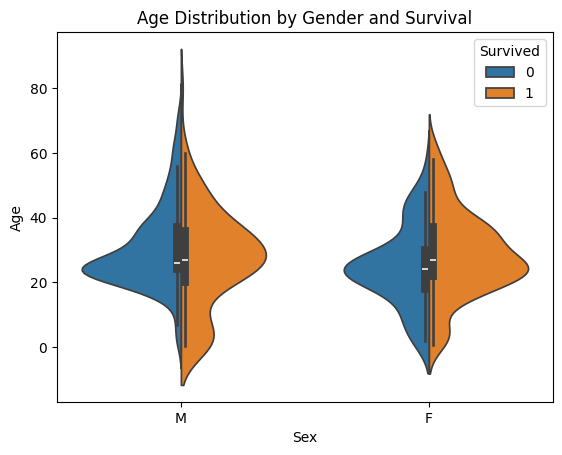

In [29]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True)
plt.title("Age Distribution by Gender and Survival")
plt.show()

###Câu 15:

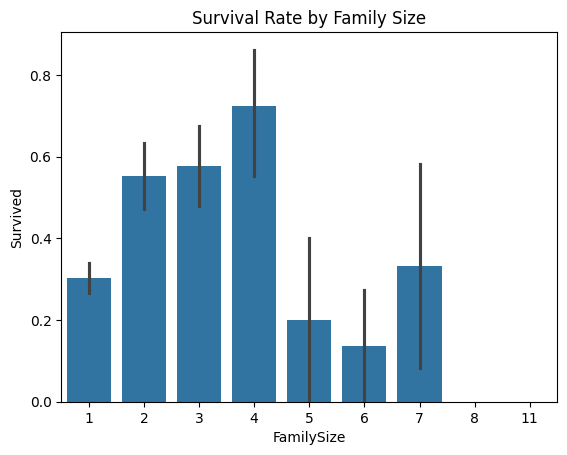

In [30]:
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title("Survival Rate by Family Size")
plt.show()

###Câu 16:

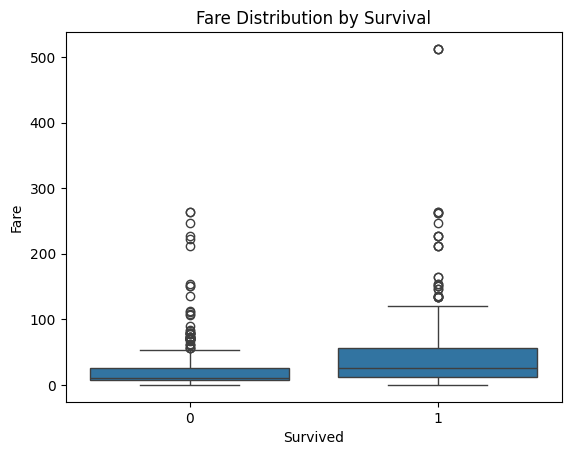

In [31]:
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare Distribution by Survival")
plt.show()

###Câu 17:

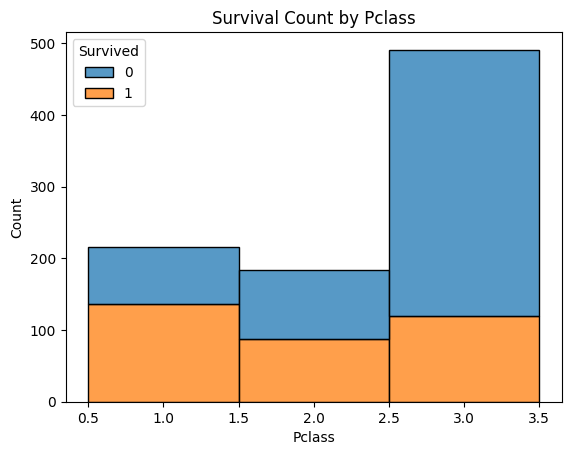

In [32]:
sns.histplot(data, x='Pclass', hue='Survived', multiple='stack', discrete=True)
plt.title("Survival Count by Pclass")
plt.show()